In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cmcrameri import cm

from constraints import (
    epsilon,
    p,
    pQCD_likelihood,
    pQCD_constraints
)

from utils import (
    rcparams,
    to_GeV_per_cubic_femtometre, 
    to_nucleons_per_cubic_femtometre
    )

plt.rcParams.update(rcparams)

In [2]:
# Some example (mu [GeV], n [1/fm^3], p [GeV/fm^3]) values

chiEFT_values = {
    'soft': [0.966, 0.176, 2.163/1000],
    'stiff': [0.978, 0.176, 3.542/1000]
}

# Keys are different values for the renormalization scale parameter X
pQCD_values = {
    1: [2.6, 6.14, 2334/1000],
    2: [2.6, 6.47, 3823/1000],
    4: [2.6, 6.87, 4284/1000]
}

# Nuclear saturation density
nsat = 0.16

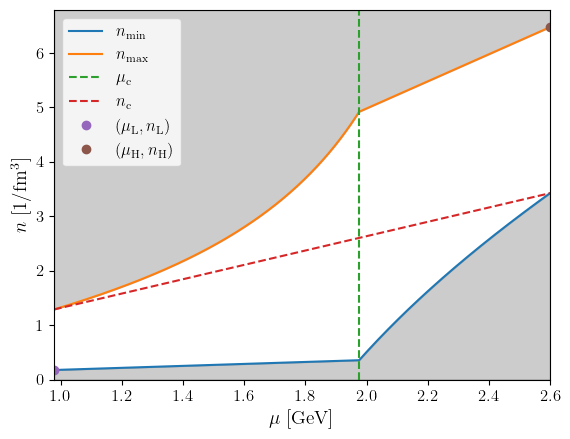

In [3]:
muL, nL, pL = chiEFT_values['stiff']
muH, nH, pH = pQCD_values[2]

mu_array = np.linspace(muL, muH, 1000)

epsilonL = epsilon(muL, nL, pL)
epsilonH = epsilon(muH, nH, pH)

constraints = pQCD_constraints(muL, nL, pL, muH, nH, pH)
fig, ax = constraints.plot_mu_n(mu_array)

In [4]:
df = pd.read_csv('collated_np_all_post.csv')
nonzero_eos = df[df.logweight_total > -np.inf]

nTOV_array = to_nucleons_per_cubic_femtometre(nonzero_eos['rhoc(M@Mmax)'])

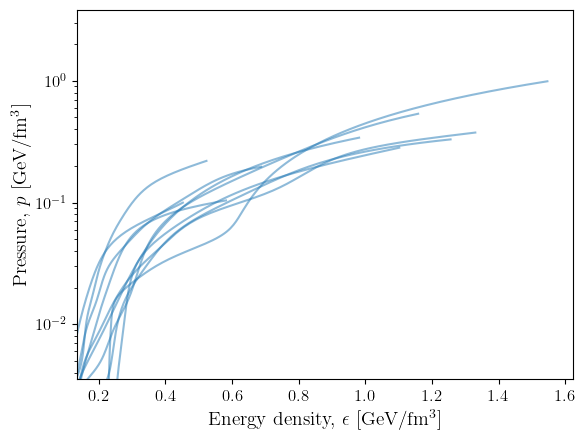

In [5]:
fig, ax = plt.subplots()
# ax.set_xscale('log')
ax.set_yscale('log')

N_samp = 10
for eos, ntov in zip(nonzero_eos.eos[:N_samp], nTOV_array[:N_samp]):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)

    end_index = np.argmin((number_density - ntov)**2)

    ax.plot(
        energy_density[:end_index], 
        pressure[:end_index], 
        alpha=0.5, 
        c='C0',
        zorder=0.1
        )
    
ax.set_xlabel(r'Energy density, $\epsilon$ [GeV/fm$^3$]')
ax.set_ylabel(r'Pressure, $p$ [GeV/fm$^3$]')

ax.set_xlim((0.1356647705101989)) # , 2.5)) # 16.153415553341855))
ax.set_ylim(constraints.pL, constraints.pH)

fig. savefig('figures/presentation/gp.png', dpi=300, bbox_inches='tight')

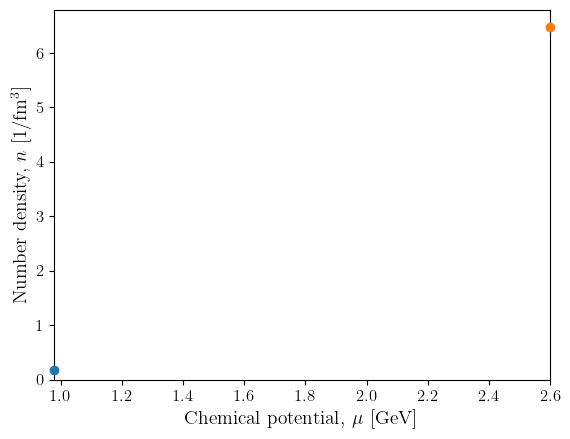

In [6]:
fig, ax = plt.subplots()

# ax.plot(mu_array, constraints.nmin(mu_array), c='C0', label=r'$n_\mathrm{min}$')
# ax.plot(mu_array, constraints.nmax(mu_array), c='C1', label=r'$n_\mathrm{max}$')

# ax.axvline(constraints.muc, ls='--', c='C2', label=r'$\mu_\mathrm{c}$')
# ax.plot(mu_array, constraints.nc(mu_array), ls='--',  c='C3', label='$n_\mathrm{c}$')

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', label=r'$(\mu_\mathrm{L}, n_\mathrm{L})$', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', label=r'$(\mu_\mathrm{H}, n_\mathrm{H})$', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

# ax.fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2)
# ax.fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2)

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

# ax.legend()

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/pqcd_constraints_0.png', dpi=300, bbox_inches='tight')

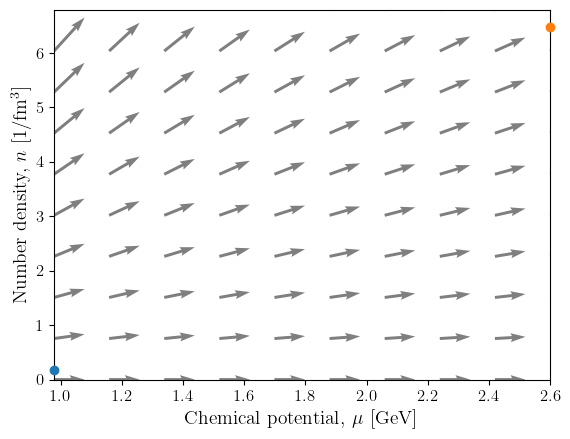

In [7]:
fig, ax = plt.subplots()

# ax.plot(mu_array, constraints.nmin(mu_array), c='C0', label=r'$n_\mathrm{min}$')
# ax.plot(mu_array, constraints.nmax(mu_array), c='C1', label=r'$n_\mathrm{max}$')

# ax.axvline(constraints.muc, ls='--', c='C2', label=r'$\mu_\mathrm{c}$')
# ax.plot(mu_array, constraints.nc(mu_array), ls='--',  c='C3', label='$n_\mathrm{c}$')

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', label=r'$(\mu_\mathrm{L}, n_\mathrm{L})$', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', label=r'$(\mu_\mathrm{H}, n_\mathrm{H})$', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

# ax.fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2)
# ax.fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2)

X = np.linspace(constraints.muL, constraints.muH, 10)
Y = np.linspace(ylim[0], ylim[1], 10)

V = np.outer(Y, 1/X)
U = np.ones_like(V)

q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='k', alpha=0.5)

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

# ax.legend()

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/pqcd_constraints_1.png', dpi=300, bbox_inches='tight')

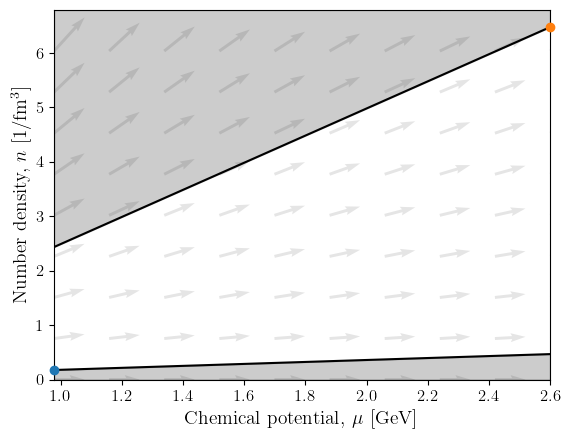

In [8]:
fig, ax = plt.subplots()

ax.plot(mu_array, constraints.nL*mu_array/constraints.muL, c='k', label=r'$n_\mathrm{min}$')
ax.plot(mu_array, constraints.nH*mu_array/constraints.muH, c='k', label=r'$n_\mathrm{max}$')

# ax.axvline(constraints.muc, ls='--', c='C2', label=r'$\mu_\mathrm{c}$')
# ax.plot(mu_array, constraints.nc(mu_array), ls='--',  c='C3', label='$n_\mathrm{c}$')

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', label=r'$(\mu_\mathrm{L}, n_\mathrm{L})$', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', label=r'$(\mu_\mathrm{H}, n_\mathrm{H})$', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

ax.fill_between(mu_array, constraints.nL*mu_array/constraints.muL, ylim[0], color='k', alpha=0.2)
ax.fill_between(mu_array, constraints.nH*mu_array/constraints.muH, ylim[1], color='k', alpha=0.2)

X = np.linspace(constraints.muL, constraints.muH, 10)
Y = np.linspace(ylim[0], ylim[1], 10)

V = np.outer(Y, 1/X)
U = np.ones_like(V)

q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='k', alpha=0.1)

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

# ax.legend()

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/pqcd_constraints_2.png', dpi=300, bbox_inches='tight')

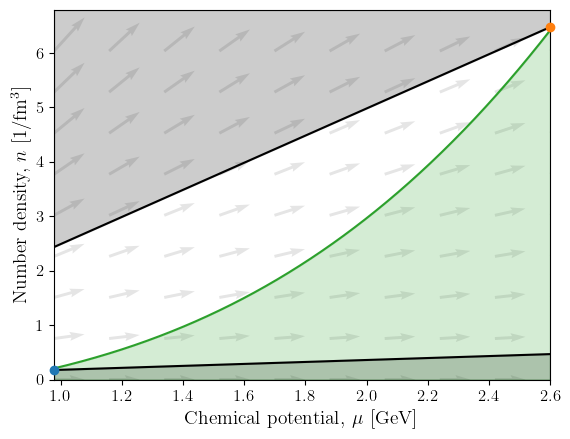

In [9]:
fig, ax = plt.subplots()

ax.plot(mu_array, constraints.nL*mu_array/constraints.muL, c='k', label=r'$n_\mathrm{min}$')
ax.plot(mu_array, constraints.nH*mu_array/constraints.muH, c='k', label=r'$n_\mathrm{max}$')

# ax.plot(mu_array, constraints.nmin(mu_array), c='C0', label=r'$n_\mathrm{min}$')
# ax.plot(mu_array, constraints.nmax(mu_array), c='C1', label=r'$n_\mathrm{max}$')

# ax.axvline(constraints.muc, ls='--', c='C2', label=r'$\mu_\mathrm{c}$')
# ax.plot(mu_array, constraints.nc(mu_array), ls='--',  c='C3', label='$n_\mathrm{c}$')

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', label=r'$(\mu_\mathrm{L}, n_\mathrm{L})$', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', label=r'$(\mu_\mathrm{H}, n_\mathrm{H})$', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

ax.fill_between(mu_array, constraints.nL*mu_array/constraints.muL, ylim[0], color='k', alpha=0.2)
ax.fill_between(mu_array, constraints.nH*mu_array/constraints.muH, ylim[1], color='k', alpha=0.2)

X = np.linspace(constraints.muL, constraints.muH, 10)
Y = np.linspace(ylim[0], ylim[1], 10)

V = np.outer(Y, 1/X)
U = np.ones_like(V)

q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='k', alpha=0.1)

a, b, c, d = [0.335, 0.010080240031938081, 0.3513617340031763, -0.4603913780608473]

def cubic_eos(mu, a, b, c, d):
    return a*mu**3 + b*mu**2 + c*mu + d

ax.plot(mu_array, cubic_eos(mu_array, a, b, c, d), c='C2', label='Cubic EOS')

ax.fill_between(mu_array, cubic_eos(mu_array, a, b, c, d), ylim[0], color='C2', alpha=0.2)

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

# ax.legend()

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/pqcd_constraints_3.png', dpi=300, bbox_inches='tight')

/var/folders/x6/wnwfrzv1471c46w4cryby1pw0000gn/T/ipykernel_5848/997035314.py:28: RuntimeWarning: divide by zero encountered in divide
  ax.plot(mu_array[above_muc], (numerator/denominator)[above_muc], c='k')
/var/folders/x6/wnwfrzv1471c46w4cryby1pw0000gn/T/ipykernel_5848/997035314.py:29: RuntimeWarning: divide by zero encountered in divide
  ax.plot(mu_array[below_muc], (numerator/denominator)[below_muc], c='k', ls='--')
/var/folders/x6/wnwfrzv1471c46w4cryby1pw0000gn/T/ipykernel_5848/997035314.py:34: RuntimeWarning: divide by zero encountered in divide
  ax.plot(mu_array[below_muc], (numerator/denominator)[below_muc], c='k')
/var/folders/x6/wnwfrzv1471c46w4cryby1pw0000gn/T/ipykernel_5848/997035314.py:35: RuntimeWarning: divide by zero encountered in divide
  ax.plot(mu_array[above_muc], (numerator/denominator)[above_muc], c='k', ls='--')


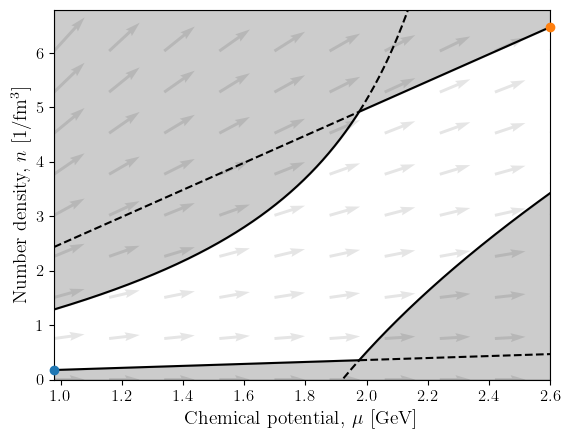

In [10]:
fig, ax = plt.subplots()

# Theory predictions

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

# Constraints

below_muc = (constraints.muL <= mu_array) & (mu_array <= constraints.muc)
above_muc = (constraints.muc <= mu_array) & (mu_array <= constraints.muH)

# Causality

ax.plot(mu_array[above_muc], (constraints.nH*mu_array/constraints.muH)[above_muc], c='k')
ax.plot(mu_array[below_muc], (constraints.nH*mu_array/constraints.muH)[below_muc], c='k', ls='--')

ax.plot(mu_array[below_muc], (constraints.nL*mu_array/constraints.muL)[below_muc], c='k')
ax.plot(mu_array[above_muc], (constraints.nL*mu_array/constraints.muL)[above_muc], c='k', ls='--')

# Integral

numerator = mu_array**3*constraints.nH - mu_array*constraints.muH*(constraints.muH*constraints.nH - 2*constraints.Deltap)
denominator = (mu_array**2 - constraints.muL**2)*constraints.muH

ax.plot(mu_array[above_muc], (numerator/denominator)[above_muc], c='k')
ax.plot(mu_array[below_muc], (numerator/denominator)[below_muc], c='k', ls='--')

numerator = mu_array**3*constraints.nL - mu_array*constraints.muL*(constraints.muL*constraints.nL + 2*constraints.Deltap)
denominator = (mu_array**2 - constraints.muH**2)*constraints.muL

ax.plot(mu_array[below_muc], (numerator/denominator)[below_muc], c='k')
ax.plot(mu_array[above_muc], (numerator/denominator)[above_muc], c='k', ls='--')

ax.fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2)
ax.fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2)

X = np.linspace(constraints.muL, constraints.muH, 10)
Y = np.linspace(ylim[0], ylim[1], 10)

V = np.outer(Y, 1/X)
U = np.ones_like(V)

q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='k', alpha=0.1)

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

# ax.legend()

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/pqcd_constraints_4.png', dpi=300, bbox_inches='tight')

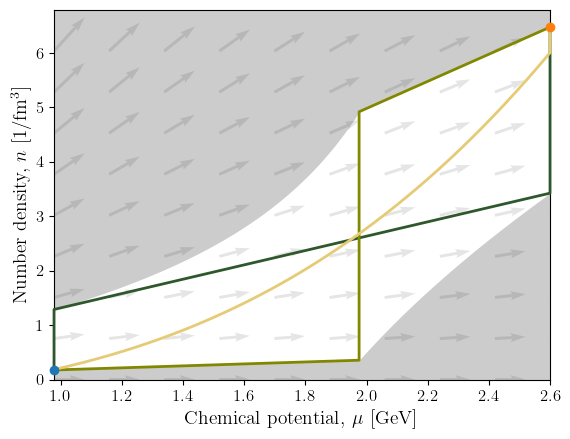

In [11]:
fig, ax = plt.subplots()

# Theory predictions

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

# Constraints

# ax.plot(mu_array, constraints.nmin(mu_array), c='k', alpha=0.75)
# ax.plot(mu_array, constraints.nmax(mu_array), c='k', alpha=0.75)

ax.fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
ax.fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

# Vector field

X = np.linspace(constraints.muL, constraints.muH, 10)
Y = np.linspace(ylim[0], ylim[1], 10)

V = np.outer(Y, 1/X)
U = np.ones_like(V)

q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='k', alpha=0.1)

# Examples EOSs

cmap = cm.bamako
lw = 2

ax.plot(
    [muL, muL, muH, muH],
    [nL, constraints.nmax(muL), constraints.nmin(muH), nH],
    c=cmap(0.3),
    lw=lw,
    clip_on=False,
    zorder=5
)

ax.plot(
    [muL, constraints.muc, constraints.muc, muH], 
    [nL, constraints.nmin(constraints.muc), constraints.nmax(constraints.muc), nH], 
    c=cmap(0.6),
    lw=lw,
    clip_on=False,
    zorder=5
    )

a, b, c, d = [0.3117926783585664, 0.010080240031938081, 0.3513617340031763, -0.4603913780608473]

ax.plot(
    np.concatenate(([muL], mu_array, [muH])),
    np.concatenate(([nL], cubic_eos(mu_array, a, b, c, d), [nH])),
    c=cmap(0.9), 
    lw=lw,
    clip_on=False,
    zorder=5
    )


# ---

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/applying_constraints_0.png', dpi=300, bbox_inches='tight')

In [12]:
select = []
for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos[:2000], nTOV_array.iloc[:2000])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)

    start_index = np.argmin((number_density - nL)**2)

    if (abs(pressure[start_index] - pL) < 0.0005) & (abs(energy_density[start_index] - epsilonL) < 0.005):
        select.append(i)

select = np.array(select)

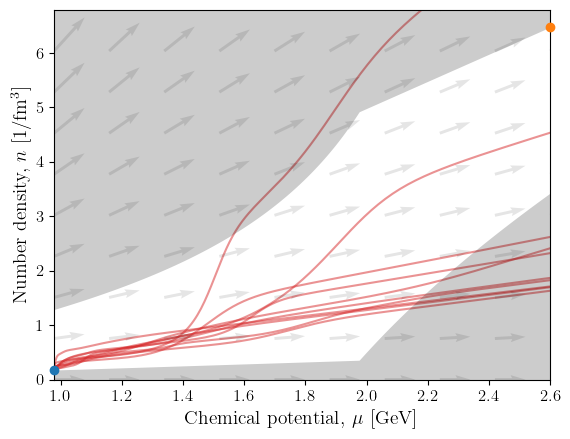

In [13]:
fig, ax = plt.subplots()

# Theory predictions

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

# Constraints

ax.fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
ax.fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

# Vector field

X = np.linspace(constraints.muL, constraints.muH, 10)
Y = np.linspace(ylim[0], ylim[1], 10)

V = np.outer(Y, 1/X)
U = np.ones_like(V)

q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='k', alpha=0.1)

# EOS draws

select_plot = select[[1,2,4,6,7,9,11,12,15,47]]

for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos.iloc[select_plot], nTOV_array.iloc[select_plot])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)
    chemical_potential = (energy_density+pressure)/number_density

    ax.plot(
        chemical_potential, 
        number_density, 
        alpha=0.5, 
        c='C3',
        zorder=0.1
        )


# ---

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/applying_constraints_1.png', dpi=300, bbox_inches='tight')

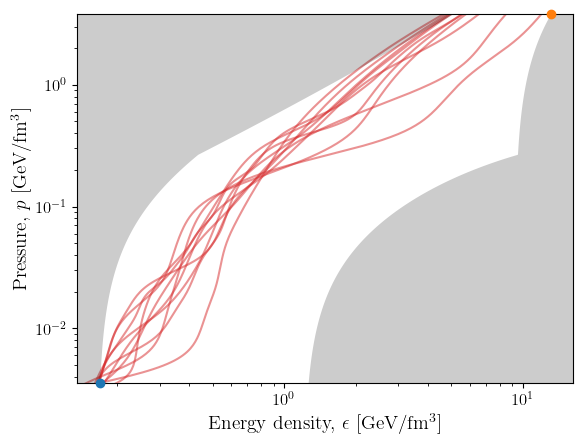

In [14]:
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')

# Theory predictions

ax.plot(constraints.epsilonL, constraints.pL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.epsilonH, constraints.pH, 'o', c='C1', zorder=10, clip_on=False)

xlim = ax.get_xlim()

# Constraints

ax.fill_betweenx(
    constraints.pmax(mu_array, constraints.nmin(mu_array)), 
    constraints.epsilon_min(mu_array), 
    xlim[0], 
    color='k', 
    alpha=0.2,
    lw=0
    )

ax.fill_betweenx(
    constraints.pmin(mu_array), 
    constraints.epsilon_max(mu_array), 
    xlim[1], 
    color='k', 
    alpha=0.2,
    lw=0
    )

# EOS draws

select_plot = select[[1,2,4,6,7,9,11,12,15,47]]

for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos.iloc[select_plot], nTOV_array.iloc[select_plot])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)
    chemical_potential = (energy_density+pressure)/number_density

    ax.plot(
        energy_density, 
        pressure, 
        alpha=0.5, 
        c='C3',
        zorder=0.1
        )

# ---

ax.set_xlabel(r'Energy density, $\epsilon$ [GeV/fm$^3$]')
ax.set_ylabel(r'Pressure, $p$ [GeV/fm$^3$]')

ax.set_xlim(xlim)
ax.set_ylim(constraints.pL, constraints.pH)

fig.savefig('figures/presentation/applying_constraints_2.png', dpi=300, bbox_inches='tight')

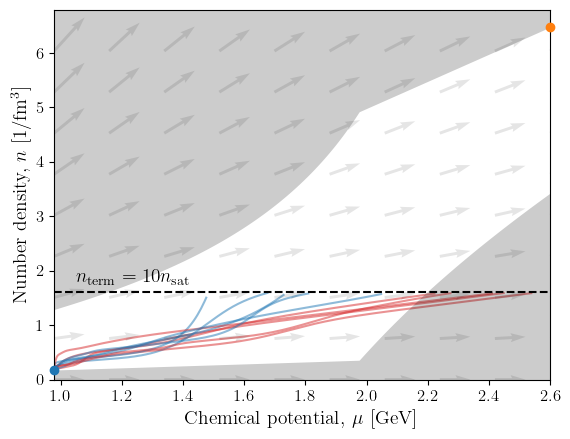

In [15]:
fig, ax = plt.subplots()

# Theory predictions

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

# Constraints

ax.fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
ax.fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

# Vector field

X = np.linspace(constraints.muL, constraints.muH, 10)
Y = np.linspace(ylim[0], ylim[1], 10)

V = np.outer(Y, 1/X)
U = np.ones_like(V)

q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='k', alpha=0.1)

# EOS draws

select_plot = select[[1,2,4,6,7,9,11,12,15,47]]

for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos.iloc[select_plot], nTOV_array.iloc[select_plot])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)
    chemical_potential = (energy_density+pressure)/number_density

    nterm = 10*nsat

    end_index = np.argmin((number_density - nterm)**2)

    allowed = pQCD_likelihood(energy_density[end_index], pressure[end_index], nterm, 2)

    # new_constraints = pQCD_constraints(
    #     chemical_potential[end_index], 
    #     number_density[end_index], 
    #     pressure[end_index], 
    #     muH, 
    #     nH, 
    #     pH
    # )
    # new_mu_array = np.linspace(chemical_potential[end_index], muH, 1000)

    # ax.plot(
    #     new_constraints.epsilon_min(new_mu_array), 
    #     new_constraints.pmax(new_mu_array, new_constraints.nmin(new_mu_array)), 
    #     c='k',
    #     )
    # ax.plot(
    #     np.concatenate(([energy_density[end_index]], new_constraints.epsilon_max(new_mu_array))), 
    #     np.concatenate(([pressure[end_index]], new_constraints.pmin(new_mu_array))), 
    #     c='k',
    #     )

    ax.plot(
        chemical_potential[:end_index], 
        number_density[:end_index], 
        alpha=0.5, 
        c='C0' if allowed else 'C3',
        zorder=0.1
        )

ax.axhline(nterm, ls='--', c='k')
ax.text(1.05, nterm+0.1, r'$n_\mathrm{term} = 10n_\mathrm{sat}$', ha='left', va='bottom', c='k')

# ---

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/applying_constraints_3.png', dpi=300, bbox_inches='tight')

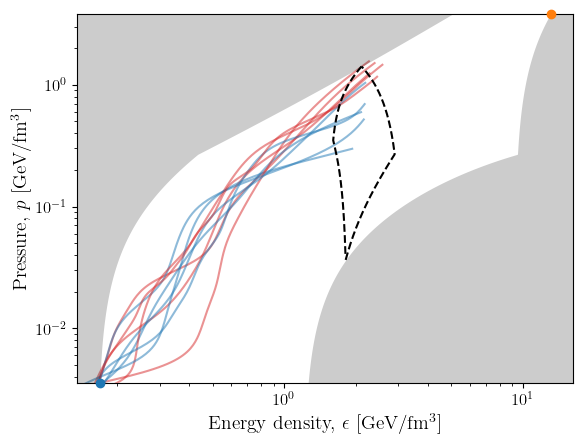

In [16]:
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')

# Theory predictions

ax.plot(constraints.epsilonL, constraints.pL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.epsilonH, constraints.pH, 'o', c='C1', zorder=10, clip_on=False)

xlim = ax.get_xlim()

# Constraints

ax.fill_betweenx(
    constraints.pmax(mu_array, constraints.nmin(mu_array)), 
    constraints.epsilon_min(mu_array), 
    xlim[0], 
    color='k', 
    alpha=0.2,
    lw=0
    )

ax.fill_betweenx(
    constraints.pmin(mu_array), 
    constraints.epsilon_max(mu_array), 
    xlim[1], 
    color='k', 
    alpha=0.2,
    lw=0
    )

# EOS draws

select_plot = select[[1,2,4,6,7,9,11,12,15,47]]

for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos.iloc[select_plot], nTOV_array.iloc[select_plot])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)
    chemical_potential = (energy_density+pressure)/number_density

    nterm = 10*nsat

    end_index = np.argmin((number_density - nterm)**2)

    allowed = pQCD_likelihood(energy_density[end_index], pressure[end_index], nterm, 2)

    # new_constraints = pQCD_constraints(
    #     chemical_potential[end_index], 
    #     number_density[end_index], 
    #     pressure[end_index], 
    #     muH, 
    #     nH, 
    #     pH
    # )
    # new_mu_array = np.linspace(chemical_potential[end_index], muH, 1000)

    # ax.plot(
    #     new_constraints.epsilon_min(new_mu_array), 
    #     new_constraints.pmax(new_mu_array, new_constraints.nmin(new_mu_array)), 
    #     c='k',
    #     )
    # ax.plot(
    #     np.concatenate(([energy_density[end_index]], new_constraints.epsilon_max(new_mu_array))), 
    #     np.concatenate(([pressure[end_index]], new_constraints.pmin(new_mu_array))), 
    #     c='k',
    #     )

    ax.plot(
        energy_density[:end_index], 
        pressure[:end_index], 
        alpha=0.5, 
        c='C0' if allowed else 'C3',
        zorder=0.1
        )

# ---
    
# Indicate the allowed region at this density
x1 = epsilon(mu_array, nterm, constraints.pmax(mu_array, nterm))
x2 = epsilon(mu_array, nterm, constraints.pmin(mu_array))
mask = x1 < x2

ax.plot(
    x1[mask], 
    constraints.pmax(mu_array, nterm)[mask], 
    c='k',
    ls='--'
    )

ax.plot(
    x2[mask], 
    constraints.pmin(mu_array)[mask], 
    c='k',
    ls='--'
    )

ax.set_xlabel(r'Energy density, $\epsilon$ [GeV/fm$^3$]')
ax.set_ylabel(r'Pressure, $p$ [GeV/fm$^3$]')

ax.set_xlim(xlim)
ax.set_ylim(constraints.pL, constraints.pH)

fig.savefig('figures/presentation/applying_constraints_4.png', dpi=300, bbox_inches='tight')

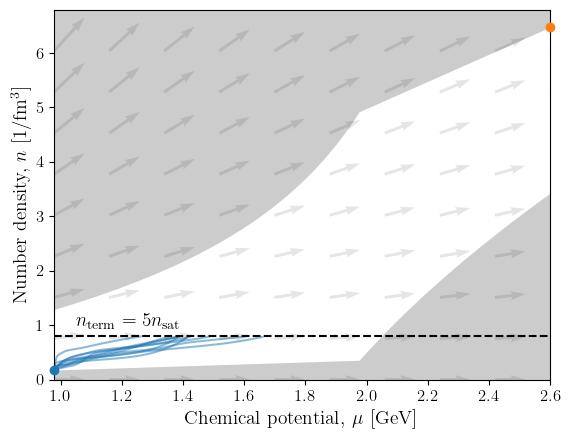

In [17]:
fig, ax = plt.subplots()

# Theory predictions

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

# Constraints

ax.fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
ax.fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

# Vector field

X = np.linspace(constraints.muL, constraints.muH, 10)
Y = np.linspace(ylim[0], ylim[1], 10)

V = np.outer(Y, 1/X)
U = np.ones_like(V)

q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='k', alpha=0.1)

# EOS draws

select_plot = select[[1,2,4,6,7,9,11,12,15,47]]

for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos.iloc[select_plot], nTOV_array.iloc[select_plot])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)
    chemical_potential = (energy_density+pressure)/number_density

    nterm = 5*nsat

    end_index = np.argmin((number_density - nterm)**2)

    allowed = pQCD_likelihood(energy_density[end_index], pressure[end_index], nterm, 2)

    # new_constraints = pQCD_constraints(
    #     chemical_potential[end_index], 
    #     number_density[end_index], 
    #     pressure[end_index], 
    #     muH, 
    #     nH, 
    #     pH
    # )
    # new_mu_array = np.linspace(chemical_potential[end_index], muH, 1000)

    # ax.plot(
    #     new_constraints.epsilon_min(new_mu_array), 
    #     new_constraints.pmax(new_mu_array, new_constraints.nmin(new_mu_array)), 
    #     c='k',
    #     )
    # ax.plot(
    #     np.concatenate(([energy_density[end_index]], new_constraints.epsilon_max(new_mu_array))), 
    #     np.concatenate(([pressure[end_index]], new_constraints.pmin(new_mu_array))), 
    #     c='k',
    #     )

    ax.plot(
        chemical_potential[:end_index], 
        number_density[:end_index], 
        alpha=0.5, 
        c='C0' if allowed else 'C3',
        zorder=0.1
        )

ax.axhline(nterm, ls='--', c='k')
ax.text(1.05, nterm+0.1, rf'$n_\mathrm{{term}} = {int(nterm/nsat)}n_\mathrm{{sat}}$', ha='left', va='bottom', c='k')

# ---

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/problems_0.png', dpi=300, bbox_inches='tight')

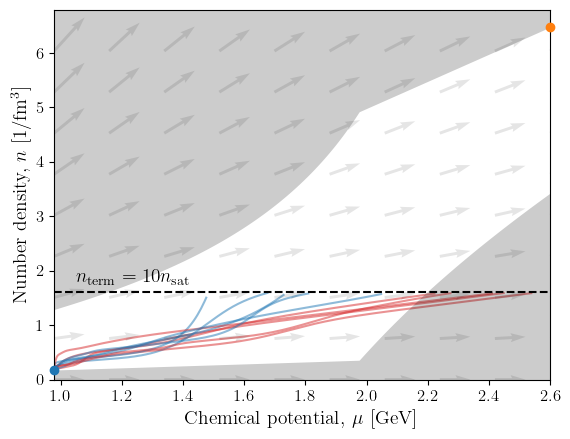

In [18]:
fig, ax = plt.subplots()

# Theory predictions

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

# Constraints

ax.fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
ax.fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

# Vector field

X = np.linspace(constraints.muL, constraints.muH, 10)
Y = np.linspace(ylim[0], ylim[1], 10)

V = np.outer(Y, 1/X)
U = np.ones_like(V)

q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='k', alpha=0.1)

# EOS draws

select_plot = select[[1,2,4,6,7,9,11,12,15,47]]

for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos.iloc[select_plot], nTOV_array.iloc[select_plot])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)
    chemical_potential = (energy_density+pressure)/number_density

    nterm = 10*nsat

    end_index = np.argmin((number_density - nterm)**2)

    allowed = pQCD_likelihood(energy_density[end_index], pressure[end_index], nterm, 2)

    # new_constraints = pQCD_constraints(
    #     chemical_potential[end_index], 
    #     number_density[end_index], 
    #     pressure[end_index], 
    #     muH, 
    #     nH, 
    #     pH
    # )
    # new_mu_array = np.linspace(chemical_potential[end_index], muH, 1000)

    # ax.plot(
    #     new_constraints.epsilon_min(new_mu_array), 
    #     new_constraints.pmax(new_mu_array, new_constraints.nmin(new_mu_array)), 
    #     c='k',
    #     )
    # ax.plot(
    #     np.concatenate(([energy_density[end_index]], new_constraints.epsilon_max(new_mu_array))), 
    #     np.concatenate(([pressure[end_index]], new_constraints.pmin(new_mu_array))), 
    #     c='k',
    #     )

    ax.plot(
        chemical_potential[:end_index], 
        number_density[:end_index], 
        alpha=0.5, 
        c='C0' if allowed else 'C3',
        zorder=0.1
        )

ax.axhline(nterm, ls='--', c='k')
ax.text(1.05, nterm+0.1, rf'$n_\mathrm{{term}} = {int(nterm/nsat)}n_\mathrm{{sat}}$', ha='left', va='bottom', c='k')

# ---

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/problems_1.png', dpi=300, bbox_inches='tight')

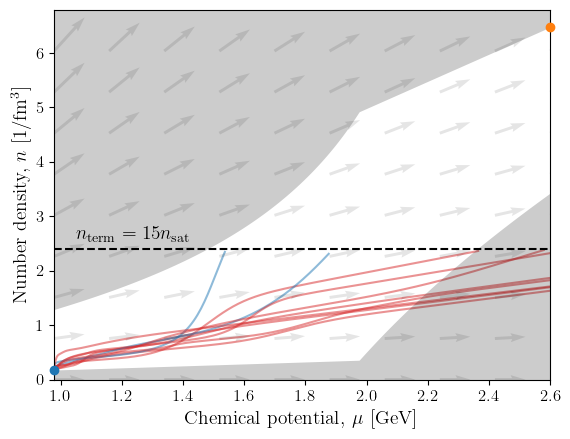

In [19]:
fig, ax = plt.subplots()

# Theory predictions

ax.plot(constraints.muL, constraints.nL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.muH, constraints.nH, 'o', c='C1', zorder=10, clip_on=False)

ylim = [0, ax.get_ylim()[1]]

# Constraints

ax.fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
ax.fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

# Vector field

X = np.linspace(constraints.muL, constraints.muH, 10)
Y = np.linspace(ylim[0], ylim[1], 10)

V = np.outer(Y, 1/X)
U = np.ones_like(V)

q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='k', alpha=0.1)

# EOS draws

select_plot = select[[1,2,4,6,7,9,11,12,15,47]]

for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos.iloc[select_plot], nTOV_array.iloc[select_plot])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)
    chemical_potential = (energy_density+pressure)/number_density

    nterm = 15*nsat

    end_index = np.argmin((number_density - nterm)**2)

    allowed = pQCD_likelihood(energy_density[end_index], pressure[end_index], nterm, 2)

    # new_constraints = pQCD_constraints(
    #     chemical_potential[end_index], 
    #     number_density[end_index], 
    #     pressure[end_index], 
    #     muH, 
    #     nH, 
    #     pH
    # )
    # new_mu_array = np.linspace(chemical_potential[end_index], muH, 1000)

    # ax.plot(
    #     new_constraints.epsilon_min(new_mu_array), 
    #     new_constraints.pmax(new_mu_array, new_constraints.nmin(new_mu_array)), 
    #     c='k',
    #     )
    # ax.plot(
    #     np.concatenate(([energy_density[end_index]], new_constraints.epsilon_max(new_mu_array))), 
    #     np.concatenate(([pressure[end_index]], new_constraints.pmin(new_mu_array))), 
    #     c='k',
    #     )

    ax.plot(
        chemical_potential[:end_index], 
        number_density[:end_index], 
        alpha=0.5, 
        c='C0' if allowed else 'C3',
        zorder=0.1
        )

ax.axhline(nterm, ls='--', c='k')
ax.text(1.05, nterm+0.1, rf'$n_\mathrm{{term}} = {int(nterm/nsat)}n_\mathrm{{sat}}$', ha='left', va='bottom', c='k')

# ---

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [1/fm$^3$]')

ax.set_xlim(constraints.muL, constraints.muH)
ax.set_ylim(ylim)

fig.savefig('figures/presentation/problems_3.png', dpi=300, bbox_inches='tight')

In [20]:
high_tension = []
low_tension = []

for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos[:2000], nTOV_array.iloc[:2000])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)
    chemical_potential = (energy_density+pressure)/number_density

    nterm = 10*nsat

    end_index = np.argmin((number_density - nterm)**2)

    allowed = pQCD_likelihood(energy_density[end_index], pressure[end_index], nterm, 2)

    if allowed:

        new_constraints = pQCD_constraints(
            chemical_potential[end_index], 
            number_density[end_index], 
            pressure[end_index], 
            muH, 
            nH, 
            pH
        )
        new_mu_array = np.linspace(chemical_potential[end_index], muH, 1000)

        if constraints.epsilonH - new_constraints.epsilon_min(muH) < 1:
            high_tension.append(i)

        if constraints.epsilonH - new_constraints.epsilon_min(muH) > 4:
            low_tension.append(i)

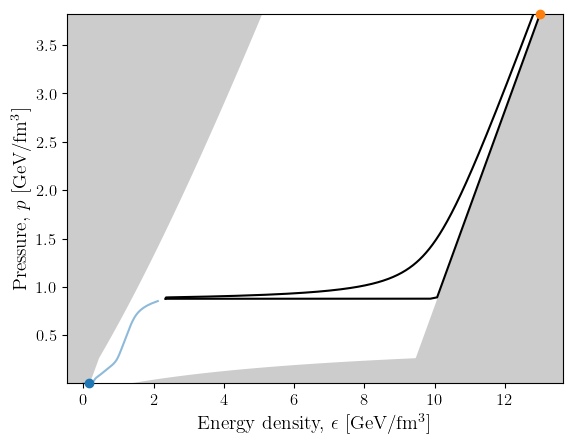

In [21]:
fig, ax = plt.subplots()

# ax.set_xscale('log')
# ax.set_yscale('log')

# Theory predictions

ax.plot(constraints.epsilonL, constraints.pL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.epsilonH, constraints.pH, 'o', c='C1', zorder=10, clip_on=False)

xlim = ax.get_xlim()

# Constraints

ax.fill_betweenx(
    constraints.pmax(mu_array, constraints.nmin(mu_array)), 
    constraints.epsilon_min(mu_array), 
    xlim[0], 
    color='k', 
    alpha=0.2,
    lw=0
    )

ax.fill_betweenx(
    constraints.pmin(mu_array), 
    constraints.epsilon_max(mu_array), 
    xlim[1], 
    color='k', 
    alpha=0.2,
    lw=0
    )

# EOS draws

select_plot = select[[1,2,4,6,7,9,11,12,15,47]]
select_plot = [high_tension[5]]

for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos.iloc[select_plot], nTOV_array.iloc[select_plot])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)
    chemical_potential = (energy_density+pressure)/number_density

    nterm = 10*nsat

    end_index = np.argmin((number_density - nterm)**2)

    allowed = pQCD_likelihood(energy_density[end_index], pressure[end_index], nterm, 2)

    new_constraints = pQCD_constraints(
        chemical_potential[end_index], 
        number_density[end_index], 
        pressure[end_index], 
        muH, 
        nH, 
        pH
    )
    new_mu_array = np.linspace(chemical_potential[end_index], muH, 1000)

    ax.plot(
        new_constraints.epsilon_min(new_mu_array), 
        new_constraints.pmax(new_mu_array, new_constraints.nmin(new_mu_array)), 
        c='k',
        )
    ax.plot(
        np.concatenate(([energy_density[end_index]], new_constraints.epsilon_max(new_mu_array))), 
        np.concatenate(([pressure[end_index]], new_constraints.pmin(new_mu_array))), 
        c='k',
        )

    ax.plot(
        energy_density[:end_index], 
        pressure[:end_index], 
        alpha=0.5, 
        c='C0' if allowed else 'C3',
        zorder=0.1
        )

# ---

ax.set_xlabel(r'Energy density, $\epsilon$ [GeV/fm$^3$]')
ax.set_ylabel(r'Pressure, $p$ [GeV/fm$^3$]')

ax.set_xlim(xlim)
ax.set_ylim(constraints.pL, constraints.pH)

fig.savefig('figures/presentation/problems_4.png', dpi=300, bbox_inches='tight')

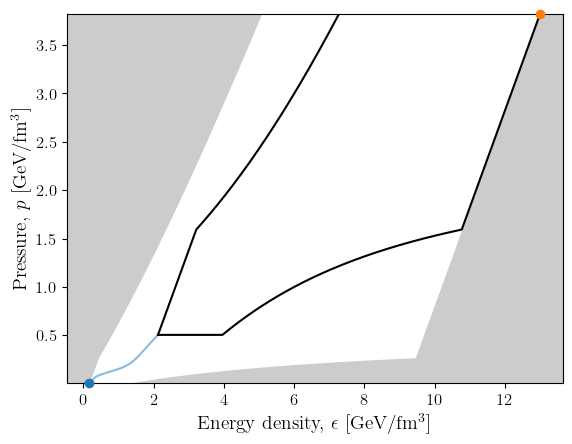

In [22]:
fig, ax = plt.subplots()

# ax.set_xscale('log')
# ax.set_yscale('log')

# Theory predictions

ax.plot(constraints.epsilonL, constraints.pL, 'o', c='C0', zorder=10, clip_on=False)
ax.plot(constraints.epsilonH, constraints.pH, 'o', c='C1', zorder=10, clip_on=False)

xlim = ax.get_xlim()

# Constraints

ax.fill_betweenx(
    constraints.pmax(mu_array, constraints.nmin(mu_array)), 
    constraints.epsilon_min(mu_array), 
    xlim[0], 
    color='k', 
    alpha=0.2,
    lw=0
    )

ax.fill_betweenx(
    constraints.pmin(mu_array), 
    constraints.epsilon_max(mu_array), 
    xlim[1], 
    color='k', 
    alpha=0.2,
    lw=0
    )

# EOS draws

select_plot = [low_tension[1]]

for i, (eos, ntov) in enumerate(zip(nonzero_eos.eos.iloc[select_plot], nTOV_array.iloc[select_plot])):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)
    chemical_potential = (energy_density+pressure)/number_density

    nterm = 10*nsat

    end_index = np.argmin((number_density - nterm)**2)

    allowed = pQCD_likelihood(energy_density[end_index], pressure[end_index], nterm, 2)

    new_constraints = pQCD_constraints(
        chemical_potential[end_index], 
        number_density[end_index], 
        pressure[end_index], 
        muH, 
        nH, 
        pH
    )
    new_mu_array = np.linspace(chemical_potential[end_index], muH, 1000)

    ax.plot(
        new_constraints.epsilon_min(new_mu_array), 
        new_constraints.pmax(new_mu_array, new_constraints.nmin(new_mu_array)), 
        c='k',
        )
    ax.plot(
        np.concatenate(([energy_density[end_index]], new_constraints.epsilon_max(new_mu_array))), 
        np.concatenate(([pressure[end_index]], new_constraints.pmin(new_mu_array))), 
        c='k',
        )

    ax.plot(
        energy_density[:end_index], 
        pressure[:end_index], 
        alpha=0.5, 
        c='C0' if allowed else 'C3',
        zorder=0.1
        )

# ---

ax.set_xlabel(r'Energy density, $\epsilon$ [GeV/fm$^3$]')
ax.set_ylabel(r'Pressure, $p$ [GeV/fm$^3$]')

ax.set_xlim(xlim)
ax.set_ylim(constraints.pL, constraints.pH)

fig.savefig('figures/presentation/problems_5.png', dpi=300, bbox_inches='tight')